In [19]:
#Imprting libraries
import json
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import FastText
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [12]:
#importing dataset
dataset_file_path = 'dataset.json'

with open(dataset_file_path, 'r', encoding='utf-8') as dataset_file:
    data = json.load(dataset_file)
    
print(data[0])

{'illness_type': 'داء السكري', 'disease_name': 'التغذية الصحية لمرضى السكري المصابين بأمراض الكلى', 'words': ['الخط', 'غذاء', 'مرضى', 'كلى', 'مكمل', 'عشب', 'امن', 'حال', 'مرضى', 'كلى', 'فيتامين', 'يمك', 'تضر', 'مرضى', 'كلى', 'ايض', 'لذل', 'يجب', 'استشار', 'طبيب', 'تناول', 'نوع', 'تعتمد', 'الخط', 'غذاء', 'مريض', 'كلى', 'حال', 'مريض', 'مرحل', 'متقدم', 'متاخر', 'مرض', 'وعل', 'يوصى', 'الحد', 'تجنب', 'اطعم', 'غذاء', 'يوصى', 'مريض', 'كلى', 'الات', 'الحد', 'صوديوم', 'مض', 'الو', 'يفقد', 'مريض', 'كلى', 'تدريج', 'قدر', 'تحقيق', 'تواز', 'مياه', 'صوديوم', 'جسم', 'لذل', 'يساعد', 'الحد', 'صوديوم', 'خفض', 'ضغط', 'الدم', 'تقليل', 'احتباس', 'سوايل', 'جسم', 'امر', 'شايع', 'مرضى', 'كلى', 'تركيز', 'طعام', 'طازج', 'والمط', 'منزل', 'تناول', 'كم', 'صغير', 'طعام', 'مطاعم', 'اطعم', 'معلب', 'لان', 'غالب', 'تحتو', 'كثير', 'صوديوم', 'اختيار', 'منتج', 'غذاء', 'تحتو', 'نسب', 'صوديوم', '5', '%', 'ملصق', 'غذاء', 'استبدال', 'ملح', 'تعزيز', 'نكه', 'اعشاب', 'توابل', 'خردل', 'والخل', 'وف', 'غضو', 'اسبوع', 'اسبوع', 'سيعت

In [13]:
df = pd.DataFrame(data)
df

,illness_type,disease_name,words
0,داء السكري,التغذية الصحية لمرضى السكري المصابين بأمراض الكلى,"[الخط, غذاء, مرضى, كلى, مكمل, عشب, امن, حال, م..."
1,داء السكري,الحموضة الكيتونية,"[حموض, كيتون, حال, طب, طارء, يجب, معالج, فور, ..."
2,أمراض القلب والدورة الدموية,انخفاض ضغط الدم الموضعي,"[انخفاض, ضغط, الدم, وضع, حال, ينخفض, ضغط, الدم..."
3,أمراض العظام,هشاشة العظام,"[مقدم, عظام, اعضاء, صلب, تكو, هيكل, عظم, جهاز,..."
4,أمراض الجهاز الهضمي,القرحة الهضمية (قرحة المعدة),"[قرح, هضم, جرح, عميق, طان, قنا, هضم, سبب, تاكل..."
...,...,...,...
417,الأمراض الجلدية,الهربس التناسلي,"[هربس, تناسل, مرض, ينتقل, طريق, اتصال, جنس, يس..."
418,الأمراض الجلدية,الذئبة الحمراء,"[ذيب, حمراء, مرض, مناع, ذات, مزم, غير, معد, يم..."
419,الأمراض الجلدية,السيلان,"[سيل, مرض, ينتقل, طريق, اتصال, جنس, ويم, يسبب,..."
420,الأمراض الجلدية,ليزر إزالة الشعر,"[ازال, شعر, ليزر, اجراء, تجميل, يستخدم, ليزر, ..."


In [14]:
# One Hot Encoding
mlb = MultiLabelBinarizer()

# Fit and transform the 'words' column
one_hot_encoded_words = mlb.fit_transform(df['words'])

# Create a DataFrame from the encoded words
one_hot_vectors = pd.DataFrame(one_hot_encoded_words, columns=mlb.classes_)

# Concatenate the original DataFrame with the one-hot encoded words DataFrame
final_df = pd.concat([df[['illness_type', 'disease_name']], one_hot_vectors], axis=1)

# Save the final DataFrame to a CSV file
final_df.to_csv('encoded_dataset.csv', index=False)

one_hot_vectors.head()

,,%,&,+,0,000,01,02,03,04,...,•عدم,•كتل,•مرض,•وقف,•يحدث,•يكو,•يمر,•يوثر,,
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Bag of words Encoding
df = pd.DataFrame(data)

# Convert the 'words' column from a list of words to space-separated strings
df['words'] = df['words'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'words' column
bag_of_words = vectorizer.fit_transform(df['words'])

# Convert bag of words matrix to DataFrame
bow_vectors = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the original DataFrame with the bag of words DataFrame
final_df = pd.concat([df[['illness_type', 'disease_name']], bow_vectors], axis=1)

# Save the final DataFrame to a CSV file
final_df.to_csv('bag_of_words_dataset.csv', index=False)

bow_vectors.head()

,000,01,02,03,04,05,10,100,100مجم,109,...,٢٥٠,٢٦٠,٣٠,٣٠٠,٣٨,٤٠,٤٥,٥٥,٦٥,٧٠
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# TF-IDF
# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert the 'words' column from a list of words to space-separated strings
df['words'] = df['words'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'words' column
tfidf_representation = vectorizer.fit_transform(df['words'])

# Convert TF-IDF matrix to DataFrame
tfidf_vectors = pd.DataFrame(tfidf_representation.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the original DataFrame with the TF-IDF DataFrame
final_df = pd.concat([df[['illness_type', 'disease_name']], tfidf_vectors], axis=1)

# Save the final DataFrame to a CSV file
final_df.to_csv('tfidf_dataset.csv', index=False)

tfidf_vectors.head()

,000,01,02,03,04,05,10,100,100مجم,109,...,٢٥٠,٢٦٠,٣٠,٣٠٠,٣٨,٤٠,٤٥,٥٥,٦٥,٧٠
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from gensim.models import Word2Vec
# Extract words from the dataset
words = [entry['words'] for entry in data]

# Train the Word2Vec model
model = Word2Vec(words, sg=0, window=5, min_count=1, workers=4)

# Save the trained model
model.save("word2vec_cbow.model")

# Load the trained model (if needed)
# model = Word2Vec.load("word2vec_cbow.model")

# Get the word vectors
cbow_vectors = model.wv

# Example usage of word vectors
print("Vector for 'عمى':", cbow_vectors['عمى'])

# You can use word_vectors similarly for other words

Vector for 'عمى': [-0.10494517  0.15456851  0.17553008  0.10978936  0.19026929 -0.48189342
  0.13138653  0.5894488  -0.17596905  0.01491084 -0.14895056 -0.20849274
 -0.36359748  0.07100406  0.02718419 -0.11106893 -0.09414186 -0.16061114
 -0.10602394 -0.57439196  0.28828242  0.17010596  0.01224106 -0.29469058
 -0.01709349  0.06175946 -0.07522449 -0.35314247 -0.46972987  0.13291268
  0.29318005  0.02421041  0.05976155 -0.2741558  -0.15779759  0.24297991
  0.14740911 -0.22014247 -0.3608783  -0.63895845  0.00631007 -0.08216195
 -0.18727127 -0.0455847   0.10751262 -0.18892293 -0.20896412 -0.05811062
  0.25112706  0.15447448 -0.03303913 -0.15967089 -0.09620201  0.2381256
 -0.19070016  0.25216204  0.18653138  0.0186327  -0.13228768 -0.0132215
  0.00332434  0.0148539  -0.06000114 -0.04193081 -0.6153811   0.30533537
  0.07100456  0.21133435 -0.50286615  0.23463601 -0.17391428  0.10014823
  0.3588906   0.03746127  0.2758486   0.06666297  0.14237115  0.01497892
 -0.14191118  0.08813135 -0.1828044

In [18]:
from gensim.models import FastText

# Extract words from the dataset
words = [entry['words'] for entry in data]

# Train the FastText model
fasttext_model = FastText(sentences=words, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model
fasttext_model.save("fasttext_model.model")

# Load the trained model (if needed)
# fasttext_model = FastText.load("fasttext_model.model")

# Get the word vectors
fastText_vectors = fasttext_model.wv

# Example usage of word vectors
print("Vector for 'عمى':", fastText_vectors['عمى'])

# You can use word_vectors similarly for other words

Vector for 'عمى': [-0.15844414  0.31231195  0.39506862  0.10239722  0.2491452  -0.35956836
  0.20700555  0.5161213  -0.3355174   0.063681   -0.07317226 -0.10008416
 -0.16196957  0.05112737  0.43353793  0.36606243  0.15424107 -0.05655051
 -0.09748608 -0.7003123   0.13880123 -0.23147671  0.15468891  0.22675289
 -0.18534555 -0.05472149  0.24744473 -0.8170861   0.08067864 -0.00444404
 -0.06320595 -0.09977858  0.14639056  0.03122423 -0.10744701 -0.103057
  0.09241666 -0.35391298  0.02641216  0.03787895 -0.36150068  0.06846907
 -0.16377683  0.33251265  0.2509871  -0.05475429  0.1007625   0.28160638
  0.1030957  -0.00131565 -0.29493818 -0.12446795  0.01886555 -0.3908253
  0.5952292  -0.2683889  -0.00986409  0.05770046  0.39235148 -0.06325133
  0.05286348  0.3904718   0.00378439 -0.3502122   0.1567568   0.05798644
  0.04172114  0.4326547   0.6384093  -0.05420337 -0.25887603 -0.3633868
  0.2155577   0.08503239  0.17621064  0.20500493  0.40106958  0.01271182
 -0.2849012   0.17857708  0.00927455 

In [24]:
#t-SNE Algorithm

def pad_vectors(vectors, max_features):
    padded_vectors = np.zeros((vectors.shape[0], max_features))
    padded_vectors[:, :vectors.shape[1]] = vectors
    return padded_vectors


cbow_vectors_np = cbow_vectors.vectors
fastText_vectors_np = fastText_vectors.vectors

# Find the maximum number of features among all vectors
max_features = max(
    one_hot_vectors.shape[1],
    bow_vectors.shape[1],
    tfidf_vectors.shape[1],
    cbow_vectors_np.shape[1],
    fastText_vectors_np.shape[1]
)

# Pad each vector set
padded_one_hot = pad_vectors(one_hot_vectors, max_features)
padded_bow = pad_vectors(bow_vectors, max_features)
padded_tfidf = pad_vectors(tfidf_vectors, max_features)
padded_cbow = pad_vectors(cbow_vectors_np, max_features)
padded_fastText = pad_vectors(fastText_vectors_np, max_features)

# Concatenate all padded vectors
all_vectors = np.concatenate([
    padded_one_hot,
    padded_bow,
    padded_tfidf,
    padded_cbow,
    padded_fastText
])


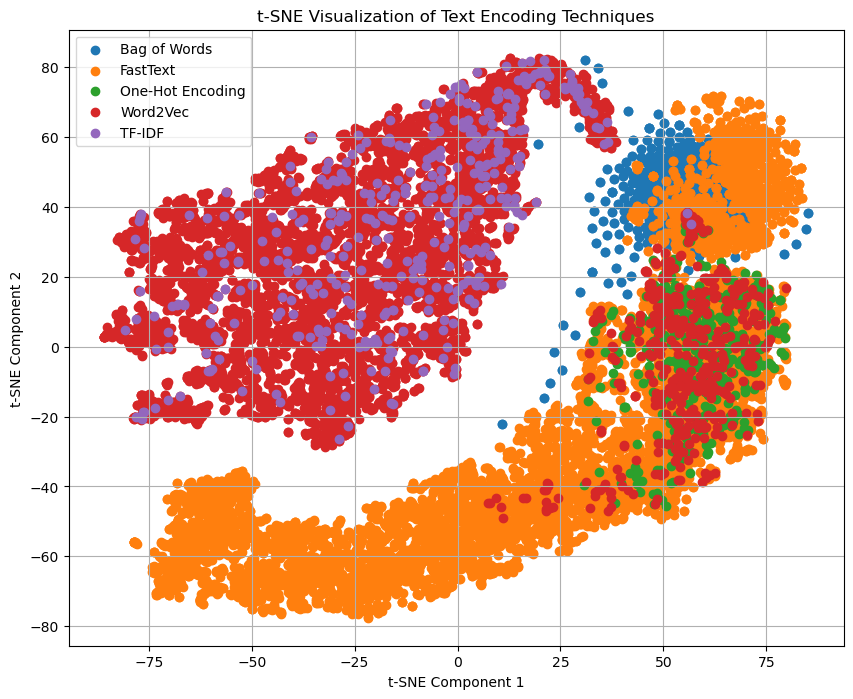

In [25]:

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_vectors = tsne.fit_transform(all_vectors)

# Define labels for each vector set
labels = ['One-Hot Encoding'] * len(padded_one_hot) + \
         ['Bag of Words'] * len(padded_bow) + \
         ['TF-IDF'] * len(padded_tfidf) + \
         ['Word2Vec'] * len(padded_cbow) + \
         ['FastText'] * len(padded_fastText)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))

# Define the start index of the vectors for each label
start_idx = 0
for label in set(labels):
    # Calculate the number of vectors for the current label
    num_vectors = labels.count(label)
    # Plot the vectors for the current label
    plt.scatter(tsne_vectors[start_idx:start_idx+num_vectors, 0], tsne_vectors[start_idx:start_idx+num_vectors, 1], label=label)
    # Update the start index for the next label
    start_idx += num_vectors

plt.title('t-SNE Visualization of Text Encoding Techniques')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()
